# 1.객체지향 퍼셉트론 API

In [1]:
import numpy as np

class Perceptron(object):
    '''
    매개변수
    ----------
    eta : float
        학습률 (0.0~1.0)
    n_iter : int
        훈련 데이터 셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    ----------
    w_ : 1-d array
        학습된 가중치
    errors_ : list
        에포크마다 누적된 분류 오류
        
    '''
    
    def __init__(self, eta=.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        '''
        매개변수
        ----------
        X : {array_like}, shape = [n_samples, n_features]
            n_samples 개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array_like, shape = [n_samples]
            타겟값
            
        반환값
        self : object
        
        '''
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

1. `fit()` 메서드
    - `fit()` 메서드에서 `self.w_` 가중치를 벡터 $\mathbb{R}^{m+1}$로 초기화
    - $m$은 데이터셋에 있는 차원(특성)의 갯수
    - 벡터의 첫 번째 원소인 절편을 위해 1을 더함 (벡터의 첫번째 원소 self.w_[0])
    - `rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])`을 사용하여 표준 편차가 0.01인 정규 분포에서 뽑은 랜덤한 작은 수를 담고 있음
    - `rgen`은 넘파이 난수 생성기로 사용자가 지정한 랜덤 시드로 이전과 동일한 결과 재현 가능
    - 가중치를 0으로 초기화하지 않는 이유는 가중치가 0이 아니어야 학습률 $\eta$가 분류 결과에 영향을 주기 때문
    - 가중치가 0으로 초기화 되어 있다면 학습률 파라미터 $\eta$는 가중치 벡터의 방향이 아니라 크기에만 영향을 미침
        ```python
            v1 = np.array([1,2,3])
            v2 = 0.5 * v1
            np.arccos(v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

            >> 0.0
        ```
    - `np.arccos()` 함수는 역코사인 삼각함수
    - `np.linalg.norm()`은 벡터의 길이를 계산하는 함수
    - 에포크 마다 `self.errors_` 리스트에 잘못 분류된 횟수를 기록함
    - 나중에 훈련하는 동안 얼마나 퍼셉트론을 잘 수행했는지 분석 가능

2. `predict()` 메서드
    - 훈련 동안 가중치를 업데이트하기 위해 `predict()` 메서드를 호출하여 클래스 레이블에 대한 예측을 얻음
    - 모델 학습 후 새로운 데이터의 클래스 레이블을 예측하는데에도 사용
    
3. `net_input()` 메서드
    - `np.dot()`를 통해 벡터 점곱을 계산

# 2.붓꽃 데이터셋에서 퍼셉트론 훈련

## 2.1.데이터 불러오기

In [2]:
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 2.2.필요한 데이터 추출

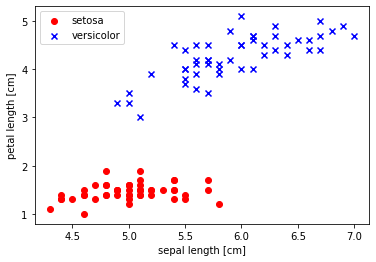

In [3]:
from matplotlib import pyplot as plt

y = df.iloc[:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color = 'blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

## 2.3.오차 그래프

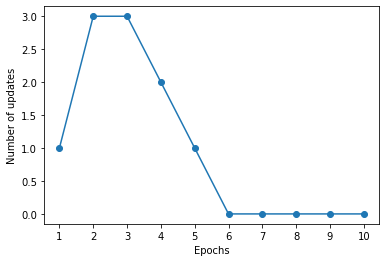

In [4]:
ppn = Perceptron(eta=.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.xticks(range(1, len(ppn.errors_)+1))
plt.ylabel('Number of updates')
plt.show()

## 2.4.결정경계 시각화

C:\Users\yunjc\AppData\Local\Temp\ipykernel_27568\1031608892.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


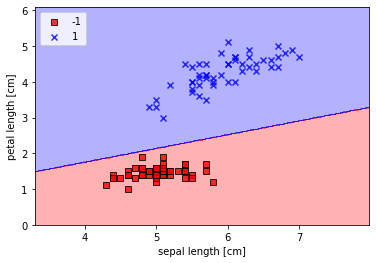

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution),)
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha = .8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

1. `colors`와 `markers` 정의하고 `ListedColormap`을 사용하여 `colors`리스트에서 컬러 맵을 만듦
2. 두 특성의 초솟값과 최댓ㄱ값을 찾고 이 벡터로 넘파이 `meshgrid`함수로 그리드 배열 `xx1`과 `xx2` 쌍을 만듦
3. 두 특성 차원에서 퍼셉트론 분류기를 훈련했기 때문에 그리드 배열을 펼치고 훈련 데이터와 같은 개수의 열이 되도록 행렬을 만듦
4. `predict` 메서드로 그리드 각 포인트에 대응하는 클래스 레이블 `z`를 예측함
5. 클래스 레이블 `z`를 `xx1`, `xx2` 같은 차원의 그리드로 크기를 변경한 후 `contourf` 함수로 등고선 그래프를 그림
6. 그리드 배열에 대해 예측한 클래스를 각기 다른 새깔로 매핑하여 결정 영역을 나타냄

* `meshgrid` 함수는 축에 해당하는 1차원 배열을 전달 받아 벡터 공간의 모든 좌표를 담은 행렬을 반환함
    ```python
        x1, x2 = np.meshgrid([0,1], [2,3])
        >> x1: [[0,1], [0,1]] / x2 = [[2,2], [3,3]]
    ```
    [0,1], [2,3] 로 생성되는 좌표는 (0,2), (1,2), (0,3), (1,3)
    
* `ravel` 메서드는 입력된 배열을 1차원으로 펼침.<br>그 다음 펼쳐진 두 개의 배열을 행으로 붙여서 하나의 행렬을 만듦.<br>
    마지막으로 행렬을 전치(.T속성)하여 두 개의 열이 되도록 바꿈 (이 두열이 xy 평면의 좌표 값이 됨)

# 3.아달린 구현

## 3.1.아달린 클래스

In [6]:
class AdalineGD(object):
    ''' 적응형 선형 뉴런 분류기
    
    매개변수
    ----------------------
    eta : float
        학습률
    n_iter : int
        훈련 데이터셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드
        
    속성
    ----------------------
    w_ : 1d-array
        학습된 가중치
    cost_ : list
        에포크마다 누적된 비용 함수의 제곱합
        
    '''
    def __init__(self, eta=.01, n_iter=50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        '''훈련 데이터 학습
        
        매개변수
        ---------------------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
            타겟값
            
        반환값
        ---------------------
        self : object
        
        '''
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y-output

            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/2.0
            
            self.cost_.append(cost)
        return self
            
    def net_input(self, X):
        '''최종 입력 계산'''
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        '''활성함수 (선형 y=x)'''
        return X
    
    def predict(self, X):
        '''단위 계단 함수를 사용하여 클래스 레이블을 반환'''
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

1. 개요
    - 퍼셉트론처럼 개별 훈련 샘플마다 평가한 후 가중치를 업데이트하지 않고 전체 훈련 데이터셋을 기반으로 grad를 계산
2. `fit()`
    - 절편(0번째 가중치)은 `self.eta * errors.sum()`임 ($w_0$에 대한 그라디언트는 $x_0$가 1이므로 $SSE$ 비용함수의 편도 함수에서 오차의 합만 남음)
    - 가중치 1에서 m까지는 `self.eta * X.T.dot(errors)` (여기서 `X.T.dot(errors)`는 특성 행렬과 오차 벡터 간의 행렬-벡터 곱)
3. `activation()`
    - 단순한 항등함수 (일반적인 개념 표시를 위해 따로 작성)

## 3.2.에포크 횟수 대비 비용 그래프

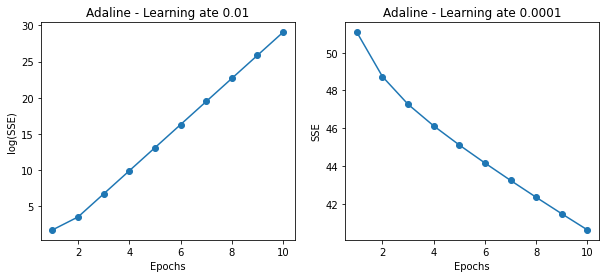

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada1 = AdalineGD(n_iter=10, eta=.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('Adaline - Learning ate 0.01')

ada2 = AdalineGD(n_iter=10, eta=.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('SSE')
ax[1].set_title('Adaline - Learning ate 0.0001')

plt.show()

* 위의 결과가 시사하는 바
    1. (왼) 학습률이 너무 크기 때문에 비용함수를 최소화하지 못하고 오차는 에포크마다 점점 더 커짐 (전역 최소값을 지나침)
    2. (오) 비용이 감소하지만 학습률이 너무 작기 때문에 전역 최솟값에 수렴하려면 아주 많은 에포크가 필요

## 3.3.특성 스케일을 조정하여 경사 하강법 결과 향상

- 최적 성능을 위해 특성 스케일을 조정하는 것이 필요
- `표준화`라는 방식으로 특성 스케일 사용(표준 정규 분포 스케일링)<br>
        $
        x^{'}_{j} = \frac{x_j-\mu_j}{\sigma_j}
        $
- $x^{'}_{j}$는 $n$개의 모든 훈련 샘플에서 j번째 특성 값을포함한 벡터

In [8]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

C:\Users\yunjc\AppData\Local\Temp\ipykernel_27568\1031608892.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


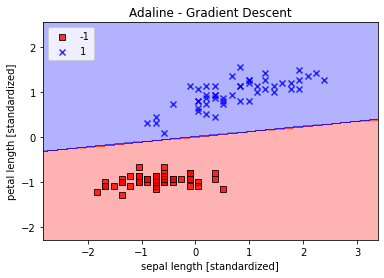

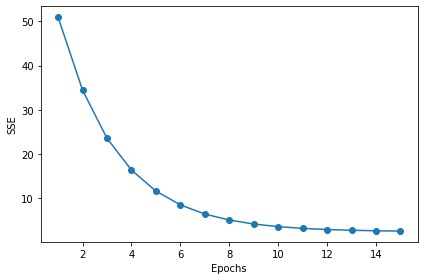

In [9]:
ada = AdalineGD(n_iter=15, eta=.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.tight_layout()
plt.show()

## 3.4.대규모 머신러닝과 확률적 경사 하강법

- 배치 경사 하강법 : 전체 훈련 데이터셋에서 계산한 그라디언트의 반대 방향으로 한 걸음씩 진행하여 비용함수를 최소화
- 큰 데이터 셋의 경우, 계산 비용이 커짐
- 전역 최솟값으로 나아가는 단계마다 매번 전체 훈련 데이터셋을 다시 평가해야 함

1. **확률적 경사 하강법**
    - 확률적 경사 하강법 (stochastic gradient descent) : 각 훈련 샘플 별로 조금씩 가중치 업데이트<br>
        $$
        \begin{align}
        \Delta w &= \eta\sum_i(y^{(i)}-\phi(z^{(i)}))x^{(i)} \\
        \Delta w &= \eta(y^{(i)}-\phi(z^{(i)}))x^{(i)} 
        \end{align}
        $$
    - (1)은 모든 샘플에 대하여 누적된오차의 합을 기반으로 가중치를 업데이트
    - (2)는 후련 샘플에 대해 조금씩 가중치를 업데이트
    - SGD는 GD의 근사로 생각할 수 있지만 가중치가 더 자주 업데이트 되기 때문에 수렴 속도가 빠름
    - 그라디언트가 하나의 훈련 샘플을 기반으로 계산되므로 오차의 궤적은 배치 경사 하강법보다 어지러움
    - 비선형 비용 함수를 다룰 때 얕은 지역 최솟값을 더 쉽게 탈출할 수 있는 것도 장점
    - SGD의 성능을 올리려면 훈련 샘플 순서를 무작위하게 주입하는 것이 중요
    - 순환되지 않도록 에포크마다 훈련 데이터셋을 섞는 것이 좋음
<br><br>

2. **학습률 조정**
    - SGD 구현에서 종종 고정된 학습률을 시간이 지남에 따라 적응적 학습률로 대치<br>
        $$
        \frac{c_1}{[numberr of iterations]+c_2}
        $$
    - $c_1$과 $c_2$는 상수
    - SGD는 전역 최솟값에는 도달하지 못하지만 매우 가까운 지역에 근접하기에, 적응적 학습률을 사용하여 최솟값에 더욱 가깝게 다가갈 수 있음
<br><br>

3. **온라인 학습**
    - SGD의 장점 중 하나는 온라인 학습으로 상용 가능
    - 온라인 학습에서 모델은 새로운 훈련 데이터가 도착하는 대로 훈련됨
    - 많은 양의 훈련 데이터가 있을 때도 유용함
<br><br>

4. **미니 배치 경사 하강법**
    - GD와 SGD의 절충점이 **미니 배치 학습**
    - 훈련 데이터의 작은 일부분으로 배치 경사 하강법을 적용
    - 예를 들어 한 번에 32개의 샘플을 사용
    - 배치 경사 하강버에 비해 가중치 업데이트가 더 자주 일어나므로 수렴 속도가 빠름
    - SGD에서 훈련 샘플을 순회하는 for 반복을 선형대수 개념을 사용한 벡터화 연산으로 바꾸어 주므로 계산 효율성 향상

In [10]:
class AdalineSGD(object):
    '''Adaptive Linear Neuron 분류기
    
    매개변수
    ----------------
    eta : float
        학습률
    n_iter : int
        훈련 데이터 셋 반복 횟수
    shuffle : bool(default:True)
        Ture 설정 시 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞음
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드
    
    속성
    ----------------
    w_ : 1d-array
        학습된 가중치
    cost_ : list
        모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합
    
    '''
    def __init__(self, eta=.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X,y):
        '''훈련 데이터 학습
        
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
            타겟값
            
        반환값
        ---------------------
        self : object
        
        '''
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        '''가중치를 다시 초기화하지 않고 훈련 데이터 학습'''
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        '''훈련 데이터 섞기'''
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        '''랜덤한 작은 수로 가중치 초기화'''
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        '''아달린 학습 규칙을 적용하여 가중치 업데이트'''
        output = self.activation(self.net_input(xi))
        error = target-output
        self.w_[1:] += self.eta*xi.dot(error)
        self.w_[0] += self.eta*error
        cost = .5*error**2
        return cost
    
    def net_input(self, X):
        '''최종 입력 계산'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        '''선형 활성화 계산'''
        return X
    
    def predict(self, X):
        '''단위 계단 함수를 사용하여 클래스 레이블 반환'''
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

C:\Users\yunjc\AppData\Local\Temp\ipykernel_27568\1031608892.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


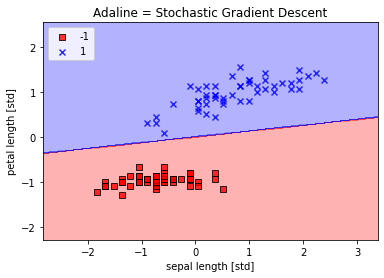

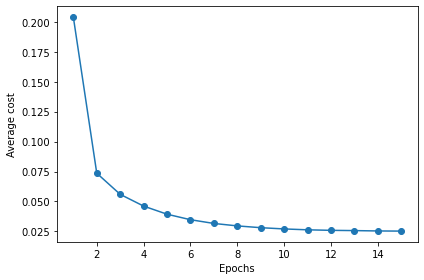

In [11]:
ada = AdalineSGD(n_iter=15, eta=.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline = Stochastic Gradient Descent')
plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Average cost")
plt.tight_layout()
plt.show()